#Introduction to Scikit learn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
heart=pd.read_csv("/content/heart-disease.csv")
car_sales=pd.read_csv("/content/car-sales-extended-missing-data.csv")


# 0. end to end Scikit-learn workflow

In [ ]:
#1. get data ready
import pandas as pd
import numpy as np

heart=pd.read_csv("/content/heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# create x -(feature matrix)
X=heart.drop("target",axis=1)

#create t-(labels)
y=-heart['target']

In [ ]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#3.fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
clf.fit(X_train,y_train);

In [ ]:
#make a prediction
y_preds=clf.predict(X_test)
y_preds

array([-1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0,
        0, -1, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0,  0,  0,  0,  0, -1, -1])

In [ ]:
y_test

,target
117,-1
60,-1
48,-1
152,-1
219,0
...,...
300,0
273,0
217,0
73,-1


In [ ]:
#4 evaluate the model
clf.score(X_train,y_train)

1.0

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          -1       0.89      0.87      0.88        38
           0       0.79      0.83      0.81        23

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
confusion_matrix(y_test,y_preds)

array([[33,  5],
       [ 4, 19]])

In [ ]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [ ]:
#5.Improve a model
#try different amount of n_estimators
np.random.seed(12)
for i in range(10,100,10):
  print(f"trying model with {i} estimators...")
  clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
  print(f"model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
  print("")

trying model with 10 estimators...
model accuracy on test set: 78.69%

trying model with 20 estimators...
model accuracy on test set: 81.97%

trying model with 30 estimators...
model accuracy on test set: 83.61%

trying model with 40 estimators...
model accuracy on test set: 88.52%

trying model with 50 estimators...
model accuracy on test set: 83.61%

trying model with 60 estimators...
model accuracy on test set: 83.61%

trying model with 70 estimators...
model accuracy on test set: 85.25%

trying model with 80 estimators...
model accuracy on test set: 83.61%

trying model with 90 estimators...
model accuracy on test set: 85.25%



In [ ]:
#6. save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1","wb"))

In [ ]:
loaded_model=pickle.load(open("/content/random_forest_model_1","rb"))
loaded_model.score(X_test,y_test)

0.8524590163934426

In [ ]:
#to ignore all warnings
import warnings
warnings.filterwarnings("ignore")# can set it to default

# 1.Getting the data ready


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Three main things :
#1.split data into features and labels(x an y)
#2.filling or disregarding missing values
#3.converting non numerical values to numerical values (feature encoding)

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
X=heart.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y=heart['target']
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
# CLEAN --> TRANSFORM --> REDUCE

In [ ]:
### Make sure its all numerical

carsales=pd.read_csv("/content/car-sales-extended.csv")

In [ ]:
carsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
carsales.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,int64


In [ ]:
# Split into X,y
X=carsales.drop('Price',axis=1)
y=carsales['Price']

#split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#build a ml model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
## have to convert words into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]#doors as 4 door or 3 door or 5
                                                  #door  are categories of cars
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                                categorical_features
                                )],remainder="passthrough")
transformed_X=transformer.fit_transform(X)

In [ ]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
dummies=pd.get_dummies(carsales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [ ]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3235867221569877

In [ ]:
## missing values
# fill them with some value  (imputation)
# remove ssamples with mmissing data altogether

In [ ]:
carsalesmissing=pd.read_csv("/content/car-sales-extended-missing-data.csv")
carsalesmissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
carsalesmissing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [ ]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing['Price']

In [ ]:
### fill missing data with pandas
#fill the Make column
carsalesmissing["Make"].fillna("missing",inplace=True)

#fill the Colour column
carsalesmissing["Colour"].fillna("missing",inplace=True)

#fill the Odometer column
carsalesmissing["Odometer (KM)"].fillna(carsalesmissing["Odometer (KM)"].mean(),inplace=True)

# fill the Doors column
carsalesmissing["Doors"].fillna(4,inplace=True)

carsalesmissing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,50


In [ ]:
# remove rows with missing price values
carsalesmissing.dropna(inplace=True)
carsalesmissing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [ ]:
len(carsalesmissing)

950

In [ ]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing['Price']

In [ ]:
## have to convert words into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]#doors as 4 door or 3 door or 5
                                                  #door  are categories of cars
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                                categorical_features
                                )],remainder="passthrough")
transformed_X=transformer.fit_transform(carsalesmissing)

In [ ]:
# filling missing values with sklearn
carsalesmissing=pd.read_csv("/content/car-sales-extended-missing-data.csv")
carsalesmissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
carsalesmissing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [ ]:
carsalesmissing.dropna(subset=['Price'],inplace=True)
carsalesmissing.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47
Price,0


In [ ]:
#split into x and y
X=carsalesmissing.drop('Price',axis=1)
y=carsalesmissing['Price']

In [ ]:
#fill missing v alues with sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill missing values with 'missing' and numerical vvalues with mean

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#create an imputer 9something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# transfom the data
filled_x=imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
carsalesfilled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
carsalesfilled.isna().sum()

,0
Make,0
Colour,0
Doors,0
Odometer (KM),0


In [ ]:
## have to convert words into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]#doors as 4 door or 3 door or 5
                                                  #door  are categories of cars
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                                categorical_features
                                )],remainder="passthrough")
transformed_X=transformer.fit_transform(carsalesfilled)

In [ ]:
# now lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

#2.Choosing the correct model and hyperparameters

Things to note:
*  Sklearn refers to machine learning models,algorithms or estimators.
* Classification problem - predicting categories (heart disease or not) sometimes clf used as classification used as a classification estimator
* Regression problems - predicting number(selling price)

https://scikit-learn.org/stable/machine_learning_map.html

In [ ]:
## picking a machine learning model for regression model

from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df=pd.DataFrame(housing['data'],columns=housing["feature_names"],)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df['target']=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
#import sklearn estimator use map
from sklearn.linear_model import Ridge

# import algorithm
#setup random seed
np.random.seed(42)

#create data
X=housing_df.drop("target",axis=1)
y=housing_df["target"] #median house price in 100k

#split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate and fit the model
model=Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)#coefficient of determination

In [ ]:
# trying different models
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(X_train,y_train)
model.score(X_test,y_test)


In [ ]:
#ensemble combination of different smaller models
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
## picking ml model for a classification model
heart=pd.read_csv("/content/heart-disease.csv")

In [ ]:
heart

In [ ]:
#limnear svc acc to map
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=LinearSVC()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8688524590163934

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

if u have structured data use ensemblle methods if u have structured data use deep learning or transfer learning


# 3. Fitting the model/algorithm on data and use to make preditions

## 3.1 Fitting the model
X=features , feature variable, data

y= labels or targets or target variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train) # how the X fits the y (trainning)(find patterns)

clf.score(X_test,y_test)#(use the patterns)

0.8524590163934426

## 3.2 Make predictions useing the models

Use maodels to make predictions

1. predict()
2. predict_proba()

In [ ]:
clf.predict(np.array([1,2,7,9,3,4]))# doesnt work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 7. 9. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# use similar data with same shape it is trained on
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
# compare predictions to truth label to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

np.float64(0.8524590163934426)

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with predict_proba()



In [ ]:
# predict_proba() returns probabilities of a clasddification label
clf.predict_proba(X_test[:5])
# probof not heart disease or heart disease

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
#chechking predictions
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [ ]:
# predict() on regression models
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#creating the data
X=housing_df.drop("target",axis=1)
y=housing_df['target']

#split into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create model instance
model=RandomForestRegressor()

#fit model
model.fit(X_train,y_train)

#make predictions
y_preds=model.predict(X_test)

In [ ]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3265721842781009

In [ ]:
housing_df['target']

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


#4. Evaluating the models

Three ways to Evaluate sklearn models/estimators:
1. Estimators built in score
2. scoring parameter
3. Problem specific metric funtion

https://scikit-learn.org/stable/model_selection.html

## 4.1 Evaluating model with score()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create x and y
X=heart.drop("target",axis=1)
y=heart['target']

#create train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create classifier model
clf=RandomForestClassifier()

#fit the training data to the clf
clf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
#highest value for the score method is 1 lowest is 0
clf.score(X_train,y_train) # returns the accuracy

1.0

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
#lests use the score method on regresssion problem
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create x and y
X=housing_df.drop("target",axis=1)
y=housing_df['target']

#create train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create classifier model
model=RandomForestRegressor(n_estimators=100)

#fit the training data to the model
model.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
# the default score() evaluation metric is r_squared for regression algorithm
model.score(X_train,y_train)

0.9736828565983116

In [ ]:
model.score(X_test,y_test)

0.8066196804802649

## 4.2 Evalutaing a model using scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create x and y
X=heart.drop("target",axis=1)
y=heart['target']

#create train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create classifier model
clf=RandomForestClassifier()

#fit the training data to the clf
clf.fit(X_train,y_train);


In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf,X,y)# default 5 folds

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [ ]:
np.random.seed(42)

#single training and test split score
clf_single_score=clf.score(X_test,y_test)

# mean of 5 fold cross val
clf_cross_val_core=np.mean(cross_val_score(clf,X,y,cv=5))

#compare
clf_single_score,clf_cross_val_core

(0.8524590163934426, np.float64(0.8248087431693989))

In [ ]:
# scoring parametere is set to none and gonna use default score model scoring param
#default scoreing param of classifier = mean accuracy ieclf.score()
cross_val_score(clf,X,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.3.1 Classification model evaluation metrics
1. Accuracy
2. area under ROC curve
3. Confusion matrix
4. Classification report



In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart.drop("target",axis=1)
y=heart['target']

clf=RandomForestClassifier()

cvc=cross_val_score(clf,X,y,cv=5)

In [ ]:
np.mean(cvc)

np.float64(0.8248087431693989)

In [ ]:
print(f"heart disease clf cross validated accuracy: {np.mean(cvc)*100}%")

heart disease clf cross validated accuracy: 82.48087431693989%


Area under the reciever operating character curve or ROC
* Area under curve(AUC) or ROC curve
* ROC curves are a comparison of a model's true positive rate(tpr) vs a models false positive rate(fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when thruth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when the truth is 1

In [ ]:
# Create X_test.. etc
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)

# make predictions with probabilities
y_probs= clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [ ]:
# Calculate fpr,tpr and thresholds
fpr, tpr, thresholds=roc_curve(y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

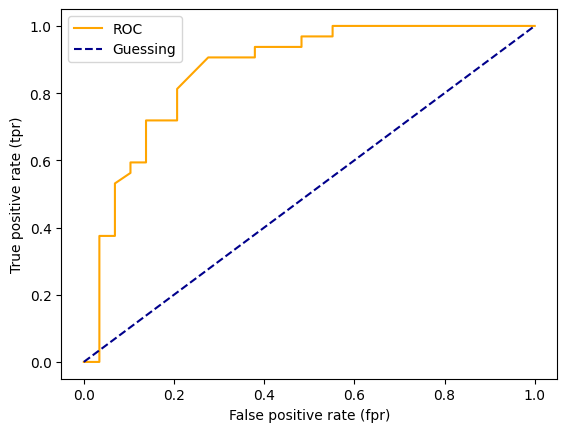

In [ ]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  """
  plots false positive rate fpr and true positin=ve rate tpr, roc curve
  """
  # Plot the roc curve(baseline)
  plt.plot(fpr,tpr,color="orange",label="ROC")

  # Plot line with no predictiions
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

np.float64(0.8669181034482759)

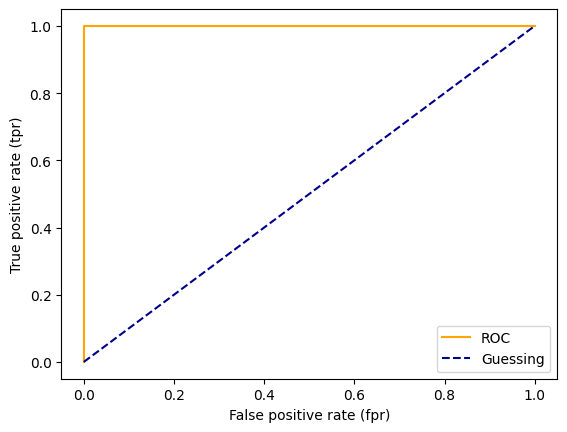

In [ ]:
# Plot perfect roc curve nd auc score
fpr, tpr, thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Perfect auc score
roc_auc_score(y_test,y_test)

np.float64(1.0)

Confusion matrix:
* A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed predicts
* In essence, giving you an idea of where the model is getting confusion

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [ ]:
# Visualise condusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],
            colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


<Axes: >

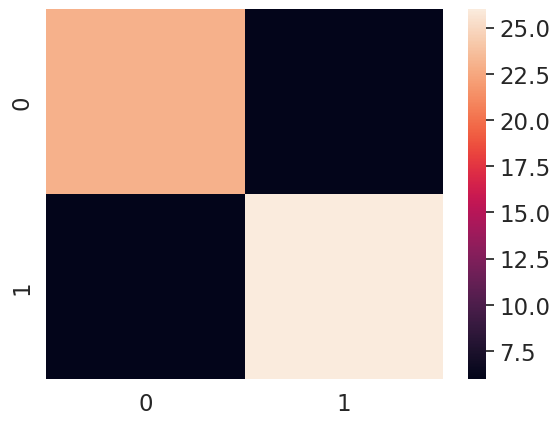

In [ ]:
# make  confusion matirx more visuals with seaborn heatmap
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

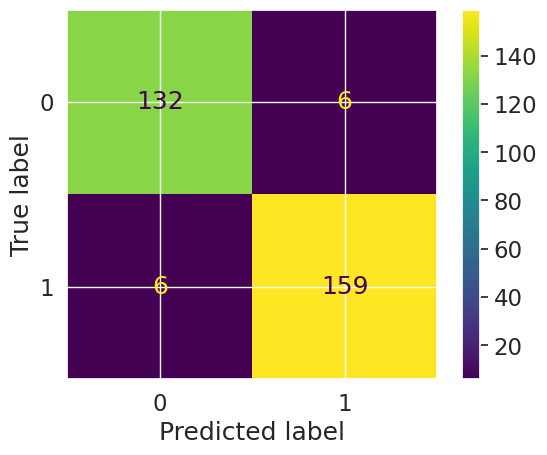

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

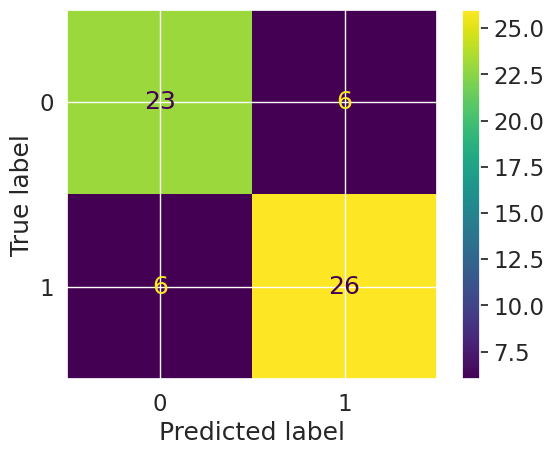

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

Classification Report
* collection of different e aluation metrics

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
## refer docs
# where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case
disease_preds=np.zeros(10000) #every case is 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4.3.2 Regression model evaluation metrics
Read docs sklearn regression evaluation
* The ones we're going to cover are:
1. R^2
2. Mean absolute error
3. Mean squared Error

R^2 score
* compares your models predictions to the mean of the targets. Values can range from - infinity(very poor) to 1 .For example if all ur model does is predict he mean of the target it r2 values will be 0, if its perfect range it scores 1

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(X_test,y_test)#R^2 score

0.8066196804802649

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.metrics import r2_score

#fill array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
r2_score(y_true=y_test,y_pred=y_test_mean)# 0 for poor r2score

0.0

In [ ]:
r2_score(y_true=y_test,y_pred=y_test) # 1 for perfect score

1.0

Mean Absolute Error
* MAE is the average of the absolute difference between predictions and actual values. It gives an idea of how wrong ur models predictions are.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae# on average the difference is either + or - of mae value between actual and predicted

0.3265721842781009

In [ ]:
df=pd.DataFrame(data={"actual_values":y_test,"predicted":y_preds})
df['diferences']=df['predicted']-df['actual_values']
df

,actual_values,predicted,diferences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [ ]:
np.abs(df['diferences']).mean()

np.float64(0.3265721842781009)

Mean Squared Error
* Mean of the squared of the errors betwween actual and predicted values

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [ ]:
df['sq_diff']=np.square(df['diferences'])
df.head()

,actual_values,predicted,diferences,sq_diff
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [ ]:
squared = np.square(df["diferences"])
squared.mean()

np.float64(0.2534073069137548)

In [ ]:
df_large_error=df.copy()
df_large_error.iloc[0]['sq_diff']=16

In [ ]:
df_large_error.head()

,actual_values,predicted,diferences,sq_diff
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [ ]:
# calculate MSE with large error
df_large_error['sq_diff'].mean()

np.float64(0.25728320720794084)

In [ ]:
df_large_error.iloc[1:100]=20

In [ ]:
df_large_error['sq_diff'].mean()

np.float64(0.7333540351264799)

## 4.4 Finally using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart.drop("target",axis=1)
y=heart['target']


clf=RandomForestClassifier()

In [ ]:
np.random.seed(42)

cv_acc=cross_val_score(clf, X,y,cv=5,scoring=None) # if scoring=None estimators defaullt scoring evaluation metric is used
                                                  # which is accuracy for clf models
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
#cross_vlidated_accuracy
print(f"the cross validated accuracy is {np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy is 82.48%


In [ ]:
np.random.seed(42)

cv_acc=cross_val_score(clf, X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
#scoring=precision
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
print(f"the cross validated precision is {np.mean(cv_precision)*100:.2f}%")

the cross validated precision is 83.30%


In [ ]:
# Recall
np.random.seed(42)
cv_recall= cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [ ]:
print(f"the cross validated recall is {np.mean(cv_recall)*100:.2f}%")

the cross validated recall is 85.45%


In [ ]:
# lets see the scoring parameter for a regression model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df['target']

model=RandomForestRegressor()

In [ ]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

np.float64(0.6545756342466266)

In [ ]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [ ]:
# mae
np.random.seed(42)

cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")#higher is better

np.mean(cv_mae)


np.float64(-0.4662123287693799)

In [ ]:
cv_mae

In [ ]:
#mse
np.random.seed(42)

cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")

np.mean(cv_mse)

In [ ]:
cv_mse

## 4.5 Using different Metric Functions
 the 3rd way to evaluate the models or estimators is to use the sklearn metric function 'sklearn.metrics'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X=heart.drop('target',axis=1)
y=heart['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds=clf.predict(X_test)
#evaluation
print("Classifier metrics on test set:")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"f1: {f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on test set:
Accuracy: 85.25%
Precision: 84.85%
recall: 87.50%
f1: 86.15%


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

y_preds=model.predict(X_test)
#evaluation
print("Regressor metrics on test set:")
print(f"r2_score: {r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test,y_preds)*100:.2f}%")
print(f"MSE: {mean_squared_error(y_test,y_preds)*100:.2f}%")

Regressor metrics on test set:
r2_score: 80.66%
MAE: 32.66%
MSE: 25.34%


# 5. Improving a model
* First predictions = baseline model
* First model = baseline model

How to improve it ?

From data perspective:
* Collect more data
* Improve the data

From a model perspective:
* Better model (more complex from simpler)
* Improve the current model

Parameters - model finds patterns in data

Hyperpatrameters -  settings on a model that we can adjust to improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.get_params() # for more info on these params go to  rdf params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameter **by hand**

make 3 sets training valiation and test

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust (Max_depts, Min_samples_leaf, Max_features, Min_samples_splits, n_estimator)

In [ ]:
def evaluate_preds(y_true, y_preds):
  accuracy=accuracy_score(y_true, y_preds)
  precision=precision_score(y_true, y_preds)
  recall=recall_score(y_true, y_preds)
  f1=f1_score(y_true, y_preds)
  metric_dict={
      "accuracy":round(accuracy, 2),
      "precision":round(precision,2),
      "recall":round(recall,2),
      "f1":round(f1,2)
  }
  print(f"acc= {accuracy*100:.2f}%")
  print(f"precision: {precision*100:.2f}%")
  print(f"recall: {recall*100:.2f}%")
  print(f"f1:{f1*100:.2f}%")
  return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#  Shuffle the data
heart_shuffled=heart.sample(frac=1)# sample it randomly and reassign the data to its normal variable or shuffle

X=heart_shuffled.drop("target",axis=1)
y=heart_shuffled["target"]

train_split=round(0.7*len(heart_shuffled)) #70%
valid_split=round(train_split+0.15*len(heart_shuffled)) #15%
X_train, y_train=X[:train_split],y[:train_split];
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

# Make bseline predictions
y_preds=clf.predict(X_valid)

#evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)

baseline_metrics

acc= 82.22%
precision: 81.48%
recall: 88.00%
f1:84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:
np.random.seed(42)

# create a second classifier with different hyperparameters
clf_2= RandomForestClassifier(n_estimators=10)# or  higher
clf_2.fit(X_train,y_train)

# make predictions
y_preds_2=clf_2.predict(X_valid)

#evaluate the classifier on validation set
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

clf_2_metrics

acc= 82.22%
precision: 84.00%
recall: 84.00%
f1:84.00%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

## 5.2 Tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={
    "n_estimators":[10,100,200,500,1000,2000],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
}
np.random.seed(42)

#split into x and y
X=heart_shuffled.drop("target",axis=1)
y=heart_shuffled['target']

#split into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# instantiate randomforestclassifier
clf=RandomForestClassifier(n_jobs=1)# how much of ur computer processor do u want to focus for the ml model

#setup RandomizedSearchCv
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,#no. of models to try
                          cv=5,
                          verbose=2)

# fit the randomizedsearchcv version of clf
rs_clf.fit(X_train,y_train);# only X_train and y_train because it does cross val

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   5.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [ ]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
# make predictions with the best hyperparasmters
rs_y_preds=rs_clf.predict(X_test)

#evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)
rs_metrics

acc= 83.61%
precision: 78.12%
recall: 89.29%
f1:83.33%


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

try more itterations for better results

## 5.3 hyperparameter tuning with grid searchcv
brute search

In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
#use best from random search to get these
grid_2={'n_estimators': [100, 200, 500, ],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

#split into x and y
X=heart_shuffled.drop("target",axis=1)
y=heart_shuffled['target']

#split into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# instantiate randomforestclassifier
clf=RandomForestClassifier(n_jobs=1)# how much of ur computer processor do u want to focus for the ml model

#setup RandomizedSearchCv
gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,
                          cv=5,
                          verbose=2)

# fit the randomizedsearchcv version of clf
gs_clf.fit(X_train,y_train);# only X_train and y_train because it does cross val

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
gs_y_preds=gs_clf.predict(X_test)

gs_metrics=evaluate_preds(y_test, gs_y_preds)

acc= 81.97%
precision: 77.42%
recall: 85.71%
f1:81.36%


## Let's compare different model metrics

<Axes: >

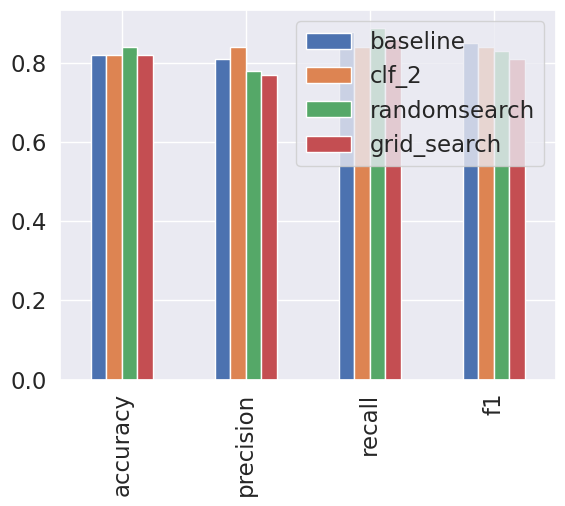

In [ ]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics
                              ,"clf_2":clf_2_metrics,
                              "randomsearch":rs_metrics,
                              "grid_search":gs_metrics})
compare_metrics.plot.bar()

***Compare with same same data shuffled again and then compare will obviouly give different result***

# 6. Saving and loading trained macchine learning model
2 ways:
1. python's 'pickle' module
2. 'joblib' module

Pickle

In [ ]:
import pickle

#save and existing mkodel to gfile
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [ ]:
#lload a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl",'rb'))


In [ ]:
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

acc= 81.97%
precision: 77.42%
recall: 85.71%
f1:81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

Joblib


In [ ]:
from joblib import dump,load

#save the model to file
dump(gs_clf, filename="gs_rnd_frst_model_2.joblib")

['gs_rnd_frst_model_2.joblib']

In [ ]:
#lopad the model
loaded_job_model=load(filename="gs_rnd_frst_model_2.joblib")

In [ ]:
jl_y_preds=loaded_job_model.predict(X_test)
evaluate_preds(y_test,jl_y_preds)

acc= 81.97%
precision: 77.42%
recall: 85.71%
f1:81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

***for large models use joblib ***


# 7. Putting it all together

Scikitlearn pipeline



In [ ]:
data=pd.read_csv("/content/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data.dtypes


,0
Make,object
Colour,object
Odometer (KM),float64
Doors,float64
Price,float64


In [ ]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


Steps we want to do (all in one cell)
1. Fill missing data
2. Convert data to numbers
3. Build an ML model

In [ ]:
# Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data=pd.read_csv("/content/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer Pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
     ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill mmissing values, then convert to numbers)
preprocessor= ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_feature)
    ])

# Creating a preprocessing and modelling pipeline
model=Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

X=data.drop("Price",  axis=1)
y=data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use "GridSearchCV" or "RandomizedSearchCV" with our pipeline

In [ ]:
# Use GridSearchCV with our regression Pipeline
pipe_grid={
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 150, 200, 250, 300],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"], # Changed 'auto' to 'sqrt' as auto is no longer supported
    "model__min_samples_split": [2, 4]
}

gs_model= GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 150, 200, 250, 300],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [ ]:
gs_model.score(X_test, y_test)

0.2938160131687769

In [ ]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 4,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}